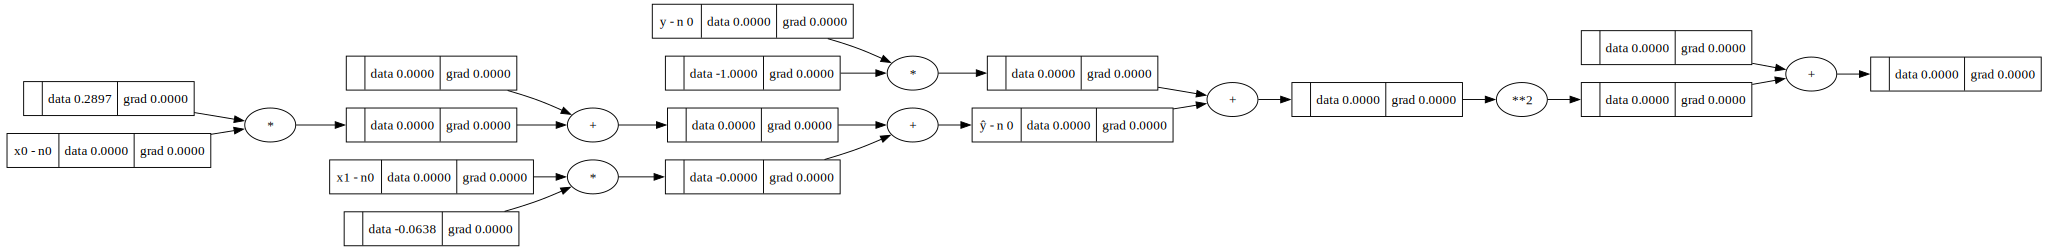

In [ ]:
from michigrad.engine import Value
from michigrad.nn import Layer, NeuronType
from michigrad.visualize import show_graph

XOR = [
    ([0,0], 0),
    ([0,1], 1),
    ([1,0], 1),
    ([1,1], 0),
]

model = Layer.new_layer(2, 1, NeuronType.Linear) # Nuevo método para crear Layer
learning_rate = 0.05
loss = Value(0)

# forward pass
for index, (x, y) in enumerate(XOR):
    (x0, x1) = (Value(x[0]), Value(x[1]))
    x0.name = f"x0 - n{index}"
    x1.name = f"x1 - n{index}"
    y = Value(y)
    y.name = f"y - n {index}"
    x = [x0,x1]
    yhat = model(x)
    yhat.name = f"ŷ - n {index}"

    # Error Cuadrático Medio
    loss += (yhat - y)**2
    break # Romper luego del primer forward pass

show_graph(loss)

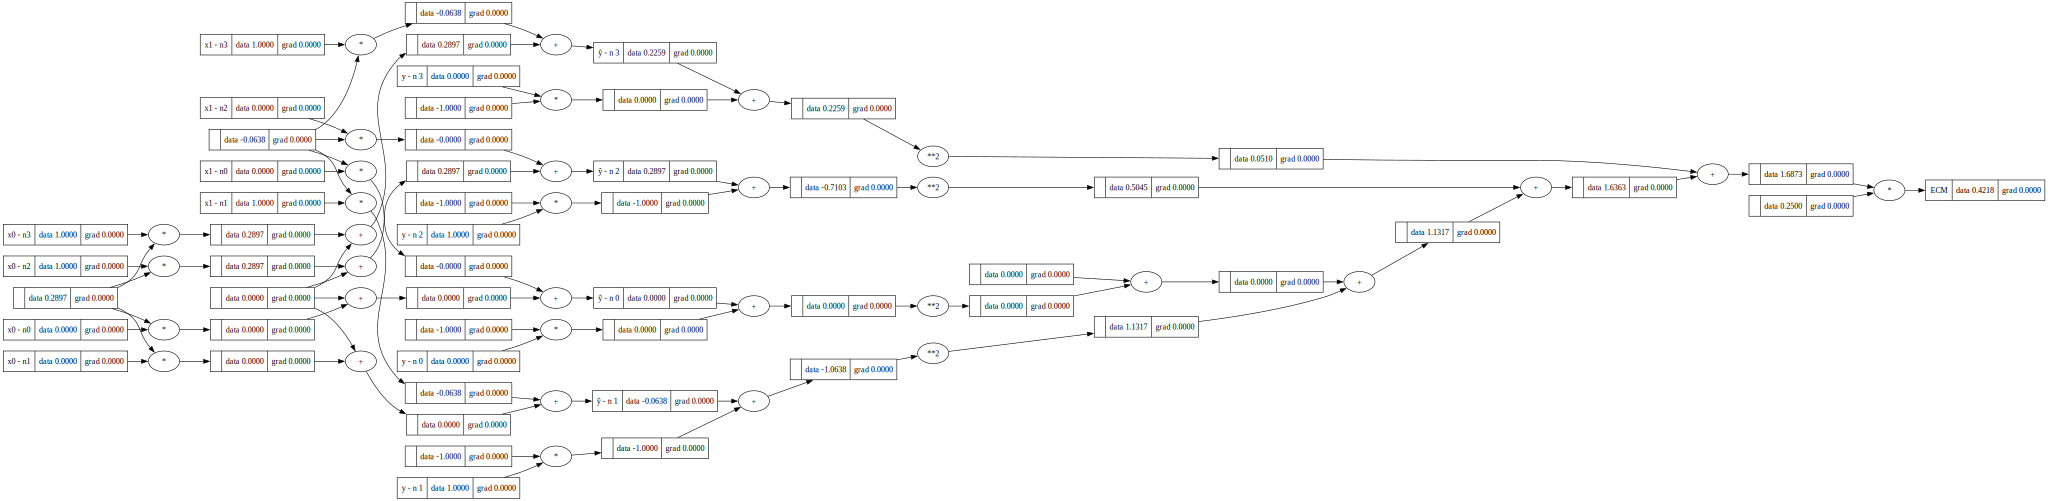

In [2]:
# forward pass (Continuación)
for index, (x, y) in enumerate(XOR):
    if index == 0:
        continue # Saltamos primer forward pass ya realizado
    (x0, x1) = (Value(x[0]), Value(x[1]))
    x0.name = f"x0 - n{index}"
    x1.name = f"x1 - n{index}"
    y = Value(y)
    y.name = f"y - n {index}"
    x = [x0,x1]
    yhat = model(x)
    yhat.name = f"ŷ - n {index}"

    # Error Cuadrático Medio
    loss += (yhat - y)**2

# 1/N * Sumatoria
loss /= len(XOR)
loss.name = "ECM"

show_graph(loss)

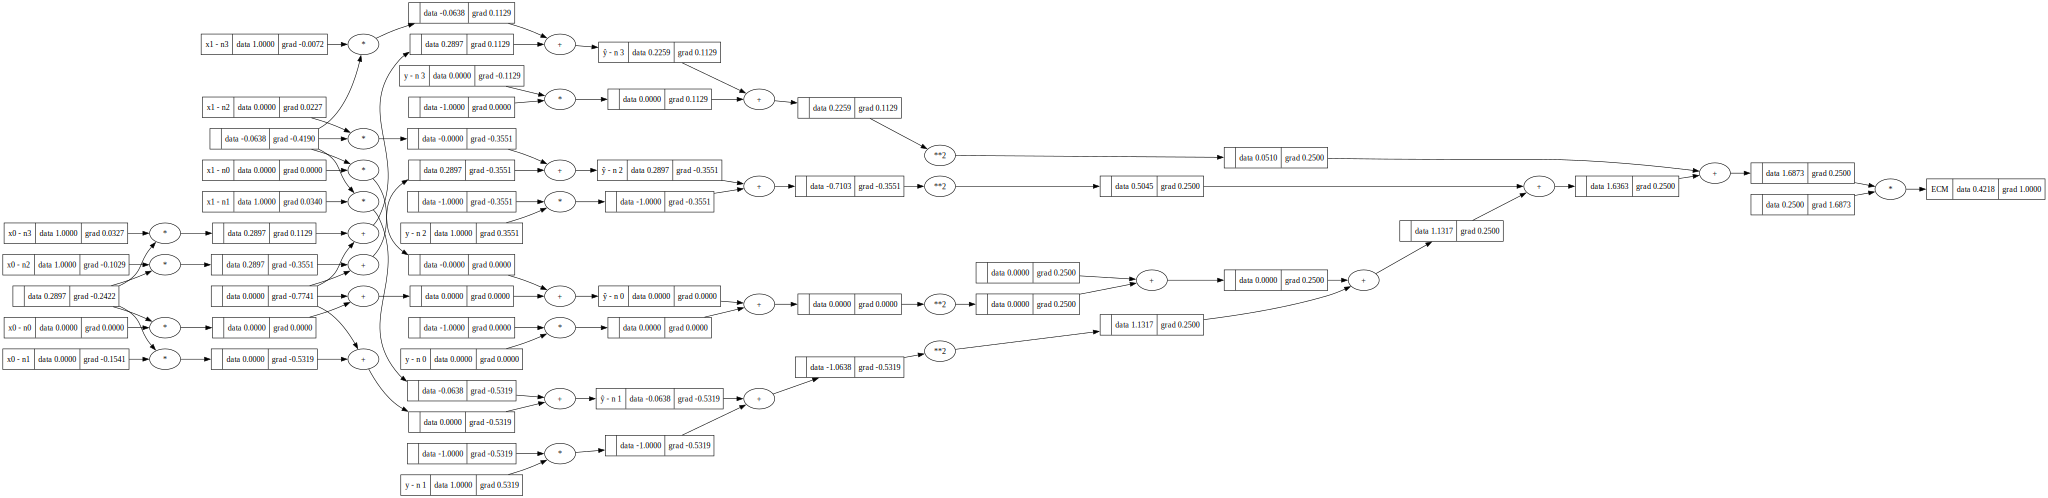

In [3]:
# Borrado de gradientes
model.zero_grad()

# Backward pass / Backpropagation
loss.backward()

show_graph(loss)

In [ ]:
# Update
for p in model.parameters():
    p.data -= learning_rate * p.grad

last_loss = float("inf")
EPOCHS = 500
# Ahora se itera, comprobando que que la función de pérdida es disminuida en cada iteración.
for epoch in range(EPOCHS):
    loss = Value(0)
    
    # forward pass
    for (x, y) in XOR:
        (x0, x1) = (Value(x[0]), Value(x[1]))
        x0.name = f"x0 - n{index}"
        x1.name = f"x1 - n{index}"
        y = Value(y)
        y.name = f"y - n {index}"
        x = [x0,x1]
        yhat = model(x)
        yhat.name = f"ŷ - n {index}"
        
        # Error Cuadrático Medio
        loss += (yhat - y)**2

    loss /= len(XOR) # 1/n * sum

    # Borrado de gradientes
    model.zero_grad()
    
    # backward
    loss.backward()

    # update
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    # Recuperar el dato de las pérdidas para comparar:
    vloss = loss
    while isinstance(vloss, Value): 
        vloss = vloss.data
    if vloss == last_loss: # Sin linealidad disimuye más rápido
        print(f"La función de pérdida no disminuyó en {epoch} | {vloss} == {last_loss}")
        break
    last_loss = vloss

print(f"Pérdida final {vloss}")
print("Parametros finales:")
for p in model.parameters():
    while isinstance(p, Value):
        p = p.data
    print(p)

print("Predicciones finales:")
# forward pass
for index, (x, y) in enumerate(XOR):
    (x0, x1) = (x[0],x[1])
    x = [x0,x1]
    yhat = model(x)

    while isinstance(yhat, Value):
        yhat = yhat.data
    
    print(f"{x0} XOR {x1} = {y} | Predicción: {yhat}")

Pérdida final 0.2500000041730885
Parametros finales:
8.750743882312363e-05
8.641156904394815e-05
0.49989685379646887
Predicciones finales:
0 XOR 0 = 0 | Predicción: 0.49989685379646887
0 XOR 1 = 1 | Predicción: 0.4999832653655128
1 XOR 0 = 1 | Predicción: 0.499984361235292
1 XOR 1 = 0 | Predicción: 0.500070772804336


# Explicación

El modelo no logra representar la función correctamente debido a que los datos no son linealmente separables. Es decir, no puede dibujares una única linea la cual separe las dos clases de salida (0 y 1). Al no poder dibujarse una linea que separe ambas clases, al menos un caso va a quedar fuera de las predicciones posibles.

Si imaginamos los posibles valores de XOR como un plano, entonces no importa como tracemos la linea en el plano, siempre queda un 0 en la clase de los 1, un 1 en la clase de los 0 o ambas. En nuestro caso el modelo entrenado se estanca en un ECM de 1/4.